In [44]:
import pandas as pd
import numpy as np
import scipy.io as sp


In [6]:
annots = sp.loadmat('devkit/cars_train_annos.mat')


In [7]:
data = [[row.flat[0] for row in line] for line in annots['annotations'][0]]
columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class', 'fname']
df_train = pd.DataFrame(data, columns=columns)

In [8]:
df_train.head()


,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname
0,39,116,569,375,14,00001.jpg
1,36,116,868,587,3,00002.jpg
2,85,109,601,381,91,00003.jpg
3,621,393,1484,1096,134,00004.jpg
4,14,36,133,99,106,00005.jpg


In [9]:
metadata = sp.loadmat('devkit/cars_meta.mat')
metadata_data = [[row.flat[0] for row in line] for line in metadata['class_names'][0]]
columns = ['class_name']
meta_train = pd.DataFrame(metadata_data, columns=columns)

In [10]:
meta_train.head()

,class_name
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


In [11]:
meta_train['class_name']
make_of_class = meta_train['class_name'].str.split()
make_labels = [row[0] for row in make_of_class]
df_labels = pd.DataFrame(make_labels) 

In [12]:
df_labels.head()

,0
0,AM
1,Acura
2,Acura
3,Acura
4,Acura


In [13]:
unique_makes = set(make_labels)

In [26]:

make_count = dict.fromkeys(unique_makes, 0)
print (make_count)

{'Porsche': 0, 'McLaren': 0, 'AM': 0, 'Mazda': 0, 'BMW': 0, 'Chevrolet': 0, 'Fisker': 0, 'Mitsubishi': 0, 'Bentley': 0, 'Scion': 0, 'Hyundai': 0, 'Honda': 0, 'smart': 0, 'Mercedes-Benz': 0, 'Land': 0, 'MINI': 0, 'HUMMER': 0, 'Volkswagen': 0, 'GMC': 0, 'Eagle': 0, 'Jeep': 0, 'Suzuki': 0, 'Geo': 0, 'Daewoo': 0, 'FIAT': 0, 'Bugatti': 0, 'Plymouth': 0, 'Acura': 0, 'Volvo': 0, 'Chrysler': 0, 'Rolls-Royce': 0, 'Dodge': 0, 'Maybach': 0, 'Spyker': 0, 'Ferrari': 0, 'Tesla': 0, 'Jaguar': 0, 'Isuzu': 0, 'Nissan': 0, 'Infiniti': 0, 'Audi': 0, 'Buick': 0, 'Toyota': 0, 'Cadillac': 0, 'Lincoln': 0, 'Ram': 0, 'Lamborghini': 0, 'Aston': 0, 'Ford': 0}


In [33]:
print (df_labels[0][0])


AM


In [40]:
for i in range(0,8144):
    make_index = df_train['class'][i]
    make_name = df_labels[0][make_index-1]
    make_count[make_name] += 1
    
    

In [41]:
make_count

{'Porsche': 48,
 'McLaren': 44,
 'AM': 45,
 'Mazda': 36,
 'BMW': 560,
 'Chevrolet': 985,
 'Fisker': 49,
 'Mitsubishi': 49,
 'Bentley': 277,
 'Scion': 50,
 'Hyundai': 489,
 'Honda': 171,
 'smart': 45,
 'Mercedes-Benz': 284,
 'Land': 92,
 'MINI': 39,
 'HUMMER': 94,
 'Volkswagen': 151,
 'GMC': 261,
 'Eagle': 53,
 'Jeep': 234,
 'Suzuki': 180,
 'Geo': 55,
 'Daewoo': 45,
 'FIAT': 64,
 'Bugatti': 84,
 'Plymouth': 49,
 'Acura': 258,
 'Volvo': 157,
 'Chrysler': 276,
 'Rolls-Royce': 128,
 'Dodge': 682,
 'Maybach': 29,
 'Spyker': 95,
 'Ferrari': 168,
 'Tesla': 45,
 'Jaguar': 53,
 'Isuzu': 45,
 'Nissan': 182,
 'Infiniti': 71,
 'Audi': 642,
 'Buick': 172,
 'Toyota': 190,
 'Cadillac': 138,
 'Lincoln': 45,
 'Ram': 47,
 'Lamborghini': 165,
 'Aston': 174,
 'Ford': 584}

<BarContainer object of 49 artists>

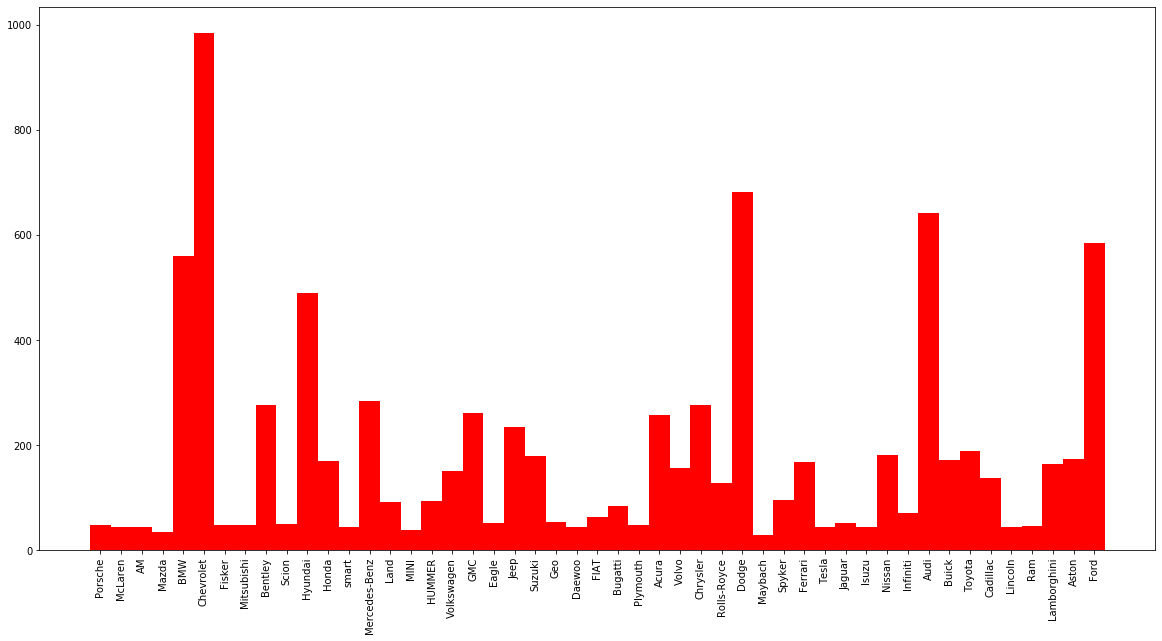

In [62]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.bar(make_count.keys(), make_count.values(), 1, color='r')

In [55]:
top_five = ["Chevrolet", "Ford", "Toyota", "Honda", "Mercedes-Benz"]
make_count_5 = {k: v for k, v in make_count.items() if k in top_five}

<BarContainer object of 5 artists>

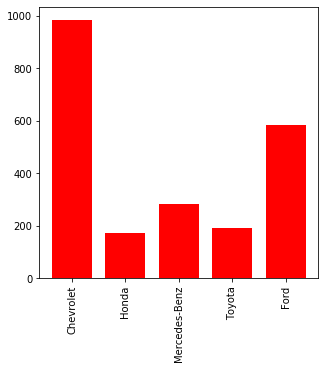

In [77]:
plt.figure(figsize=(5,5))
plt.xticks(rotation='vertical')
plt.bar(make_count_5.keys(), make_count_5.values(), 0.75, color='r')


In [78]:
make_count_5.values()

dict_values([985, 171, 284, 190, 584])

In [82]:
meta_train[55:70]

,class_name
55,Chevrolet Corvette ZR1 2012
56,Chevrolet Corvette Ron Fellows Edition Z06 2007
57,Chevrolet Traverse SUV 2012
58,Chevrolet Camaro Convertible 2012
59,Chevrolet HHR SS 2010
60,Chevrolet Impala Sedan 2007
61,Chevrolet Tahoe Hybrid SUV 2012
62,Chevrolet Sonic Sedan 2012
63,Chevrolet Express Cargo Van 2007
64,Chevrolet Avalanche Crew Cab 2012


In [83]:
len(unique_makes)

49

In [84]:
len(make_labels)

196